In [1]:
print('hello')
import platform
platform.python_version()

hello


'3.5.5'

In [3]:

%matplotlib inline

In [4]:
%matplotlib inline
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


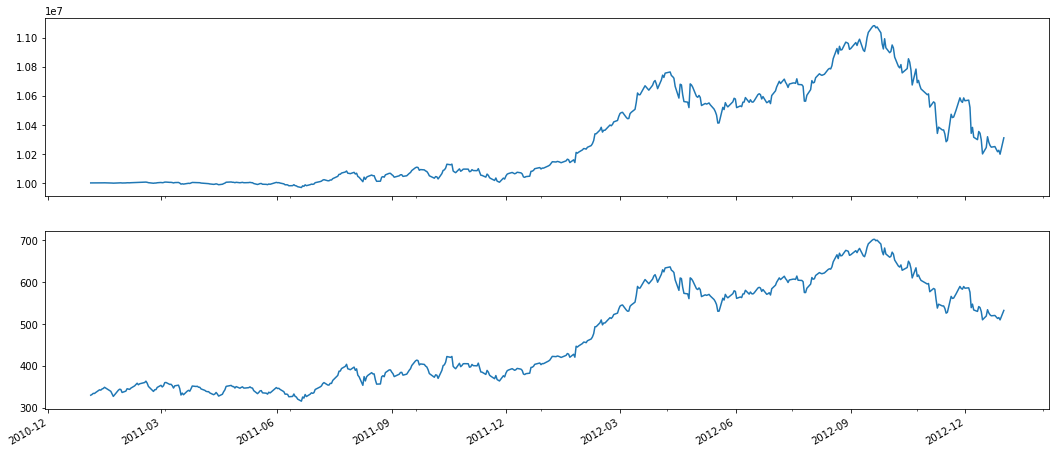

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-01-03 21:00:00+00:00,329.570,NaN,0.000000e+00,NaN,0.000169,NaN,NaN,0.000000,1.000000e+07,0.00,...,0.0,0.0,0,NaN,1.000000e+07,0.00,0.00,1,[],0.0
2011-01-04 21:00:00+00:00,331.290,0.000002,-1.666450e-07,NaN,0.000337,0.000000,NaN,-3314.566450,9.996685e+06,3312.90,...,0.0,0.0,0,-11.224972,1.000000e+07,0.00,0.00,2,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-05 21:00:00+00:00,334.000,0.000024,2.375355e-06,NaN,0.000506,0.000000,NaN,-3341.680000,9.993344e+06,6680.00,...,0.0,0.0,0,130.639936,9.996685e+06,3312.90,3312.90,3,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-06 21:00:00+00:00,333.730,0.000023,1.667490e-06,NaN,0.000675,0.000000,NaN,-3338.978650,9.990005e+06,10011.90,...,0.0,0.0,0,18.200004,9.993344e+06,6680.00,6680.00,4,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-07 21:00:00+00:00,336.120,0.000051,8.668430e-06,NaN,0.000844,0.000000,NaN,-3362.890600,9.986642e+06,13444.80,...,0.0,0.0,0,84.623827,9.990005e+06,10011.90,10011.90,5,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-10 21:00:00+00:00,342.455,0.000159,3.383620e-05,NaN,0.001013,0.000000,NaN,-3426.272275,9.983216e+06,17122.75,...,0.0,0.0,0,301.537108,9.986642e+06,13444.80,13444.80,6,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-11 21:00:00+00:00,341.640,0.000156,2.958938e-05,NaN,0.001182,0.000000,NaN,-3418.118200,9.979797e+06,20498.40,...,0.0,0.0,0,41.206019,9.983216e+06,17122.75,17122.75,7,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-12 21:00:00+00:00,344.420,0.000160,4.609617e-05,NaN,0.001350,0.000000,NaN,-3445.932100,9.976352e+06,24109.40,...,0.0,0.0,0,60.046748,9.979797e+06,20498.40,20498.40,8,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-13 21:00:00+00:00,345.680,0.000151,5.474233e-05,NaN,0.001519,0.000000,NaN,-3458.538400,9.972893e+06,27654.40,...,0.0,0.0,0,67.230966,9.976352e+06,24109.40,24109.40,9,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0
2011-01-14 21:00:00+00:00,348.480,0.000164,7.696709e-05,NaN,0.001688,0.000000,NaN,-3486.552400,9.969406e+06,31363.20,...,0.0,0.0,0,89.674249,9.972893e+06,27654.40,27654.40,10,"[{'commission': None, 'sid': Equity(8 [AAPL]),...",0.0


In [11]:
%%zipline --start=2011-1-1 --end=2013-1-1 -o=p

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

In [13]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
import pandas as pd

bundle_name = "quandl"
ticker_name = "AAPL"
end_date = pd.Timestamp('2018-08-01', tz='utc')
calendar_name = "the calendar name"
window=100 # how many days you want to look back

bundle_data = bundles.load(bundle_name)
data_por = DataPortal(bundle_data.asset_finder, 
                      get_calendar(calendar_name),
                      bundle_data.equity_daily_bar_reader.first_trading_day,
                      equity_minute_reader=bundle_data.equity_minute_bar_reader,
                      equity_daily_reader=bundle_data.equity_daily_bar_reader,
                      adjustment_reader=bundle_data.adjustment_reader)

sym = data_por.asset_finder.lookup_symbol(ticker_name, end_date)
data = data_por.get_history_window(assets=[sym],
                                   end_dt=end_date,
                                   bar_count=window,
                                   frequency='1d',
                                   data_frequency='daily',
                                   field='close')

NameError: name 'get_calendar' is not defined